In [1]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np

In [4]:
# import NDP file (~3GB of plain text)
ndp_file = "../227-www-ndp-ca.txt"

In [5]:
# load the NDP plain text as a dataframe
df = pd.read_csv(ndp_file, sep = ",", usecols=[0,1,2,3], header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)
df = df.sort_values(0)

In [6]:
# there is too much data in this dataframe!
# let's focus just on the homepage
# find a homepage to focus on for the diffs
homepages = df.loc[df[2] == "http://www.ndp.ca/"]

In [7]:
# how many homepages are there?
len(homepages)

90

In [8]:
# let's look at the first ROW of the dataframe
# this should be, given sorting, the first crawl

homepages.iloc[0].tolist()

['(20051007',
 'www.ndp.ca',
 'http://www.ndp.ca/',
 "NDP | The New Democratic Party of Canada ABOUT ›\xa0Jack Layton ›\xa0Our Caucus ›\xa0Our History ›\xa0Contact Us GET INVOLVED ›\xa0Your Riding ›\xa0Campaigns ›\xa0Events ›\xa0Youth RESOURCES ›\xa0Press Room ›\xa0Speeches & Articles ›\xa0Downloads ›\xa0e.NDP ›\xa0More... SEARCH ›\xa0Français\xa0 › NDP Budget Details › Jack's Budget Speech › Quotes on NDP Budget › Session in Review Privacy Policy |\xa0Jobs |\xa0RSS © 2005 New Democratic Party"]

In [9]:
# let's just strip the text out
# this is the fourth column in the dataframe
# (which is 3 in Python's start from 0 numbering)

alltext = homepages[3].tolist()

# alltext now contains all of the homepage text

In [10]:
# let's begin by comparing texts
# we can load the SequenceMatcher library

from difflib import SequenceMatcher

In [37]:
# Want to see what the difference is in splitting the character strings into words using function found online
def my_get_opcodes(a, b):
    s = SequenceMatcher(None, a, b)
    for tag, i1, i2, j1, j2 in s.get_opcodes():
        print('{:7}   a[{}:{}] --> b[{}:{}] {!r:>8} --> {!r}'.format(tag, i1, i2, j1, j2, a[i1:i2], b[j1:j2]))

for y in range (5,10):
    first_page = homepages.iloc[y].tolist()
    second_page = homepages.iloc[y+1].tolist()
    print(first_page[3])
    print(first_page[3].split())
    my_get_opcodes(first_page[3],second_page[3])
    my_get_opcodes(first_page[3].split(),second_page[3].split())

NDP | The New Democratic Party of Canada ABOUT › Jack Layton › Our Caucus › Our History › Contact Us GET INVOLVED › Your Riding › Campaigns › Events › Youth RESOURCES › Press Room › Speeches & Articles › Downloads › e.NDP › More... SEARCH › Français  › NDP Budget Details › Jack's Budget Speech › Quotes on NDP Budget › Session in Review Privacy Policy | Jobs | RSS © 2005 New Democratic Party
['NDP', '|', 'The', 'New', 'Democratic', 'Party', 'of', 'Canada', 'ABOUT', '›', 'Jack', 'Layton', '›', 'Our', 'Caucus', '›', 'Our', 'History', '›', 'Contact', 'Us', 'GET', 'INVOLVED', '›', 'Your', 'Riding', '›', 'Campaigns', '›', 'Events', '›', 'Youth', 'RESOURCES', '›', 'Press', 'Room', '›', 'Speeches', '&', 'Articles', '›', 'Downloads', '›', 'e.NDP', '›', 'More...', 'SEARCH', '›', 'Français', '›', 'NDP', 'Budget', 'Details', '›', "Jack's", 'Budget', 'Speech', '›', 'Quotes', 'on', 'NDP', 'Budget', '›', 'Session', 'in', 'Review', 'Privacy', 'Policy', '|', 'Jobs', '|', 'RSS', '©', '2005', 'New', 'Dem

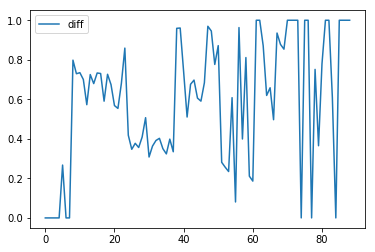

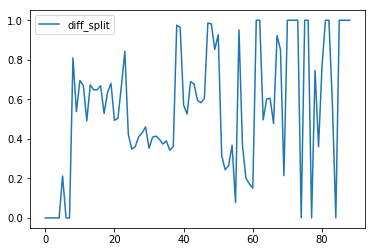

In [45]:
# let's now iterate through each pair of pages, diffing them 
# with each other. 
# we then create a list of lists, which can feed into a DF
#

final = []
final_split = []
for y in range (0,len(homepages)-1):
    first_page = homepages.iloc[y].tolist()
    second_page = homepages.iloc[y+1].tolist()
    seq = SequenceMatcher(None, first_page[3],second_page[3])
    seq_split = SequenceMatcher(None, first_page[3].split(),second_page[3].split())
    distance = 1-seq.ratio()
    distance_split = 1-seq_split.ratio()
    data = first_page[0],first_page[2],second_page[0],second_page[2],distance
    data_split = first_page[0],first_page[2],second_page[0],second_page[2],distance_split
    final.append(list(data))
    final_split.append(list(data_split))

# now in final we have the results.
# let's turn it into a dataframe
ndp_diffs_sequence = pd.DataFrame(final, columns=['origin_date','origin_url','target_date','target_url','diff'])
ndp_diffs_sequence_split = pd.DataFrame(final_split, columns=['origin_date','origin_url','target_date','target_url','diff_split'])

# here I sort the dataframes
# in this example, the lower diff numbers are most different
ndp_diffs_sequence.plot()
ndp_diffs_sequence_split.plot()
#sorted = ndp_diffs_sequence.sort_values('diff')

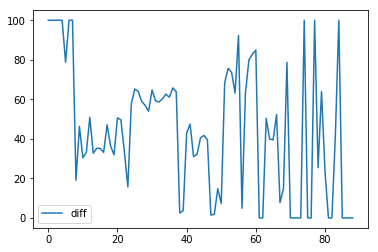

In [14]:
sorted

,origin_date,origin_url,target_date,target_url,diff
88,(20180724,http://www.ndp.ca/,(20180807,http://www.ndp.ca/,0.000000
86,(20180505,http://www.ndp.ca/,(20180724,http://www.ndp.ca/,0.000000
85,(20180505,http://www.ndp.ca/,(20180505,http://www.ndp.ca/,0.000000
87,(20180724,http://www.ndp.ca/,(20180724,http://www.ndp.ca/,0.000000
82,(20180205,http://www.ndp.ca/,(20180205,http://www.ndp.ca/,0.000000
81,(20171105,http://www.ndp.ca/,(20180205,http://www.ndp.ca/,0.000000
61,(20131105,http://www.ndp.ca/,(20140205,http://www.ndp.ca/,0.000000
62,(20140205,http://www.ndp.ca/,(20140505,http://www.ndp.ca/,0.000000
70,(20160205,http://www.ndp.ca/,(20160505,http://www.ndp.ca/,0.000000
71,(20160505,http://www.ndp.ca/,(20160505,http://www.ndp.ca/,0.000000
